In [1]:
import xarray as xr
from matplotlib import pyplot as plt
import numpy as np
%load_ext autoreload
%autoreload 2
import pei.laborfunctions as lf
from cartopy import crs as ccrs
import cartopy.feature as cfeature
from cartopy.util import add_cyclic_point
import matplotlib.patches as mpatches

In [117]:
# Load labor capacity data
ds = xr.open_dataset('../data/processed/GFDL/Monthly_Capacity/monthly_capacity_ens1-3_1950-2100.nc').rename({'__xarray_dataarray_variable__':'capacity'})

In [118]:
ds_base = ds.sel(time=slice('1980-01-31','1999-12-31')).mean(dim='ensemble').groupby('time.month').mean()['capacity']

In [119]:
ds = ds.sel(time=slice('2000-01-31',None))['capacity']

In [129]:
test_ds = ds.to_dataset()

In [136]:
test_ds['base'] = ds_base.sel(month=test_ds['time.month'],lat=test_ds['lat'],lon=test_ds['lon'])

In [142]:
ds_under = test_ds['capacity']<test_ds['base']

In [147]:
ds_3 = ds_under.groupby('time.year').sum() > 3

In [146]:
def emergence(ds,start_year):
    ds_thres = ds.nonzero()
    
    # If non-empty, index + startyear = ToE
    if len(ds_thres[0]) > 0:
        return start_year+(ds_thres[0][0].item())
    
    # If empty, return year after 2100
    return 2101

In [154]:
result = xr.apply_ufunc(emergence,ds_3,input_core_dims=[['year']],vectorize=True,kwargs={'start_year':2000})

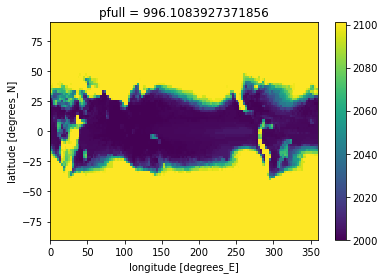

In [155]:
result.mean('ensemble').plot()

In [164]:
# Load WBT and temp data
paths_wbt = ['../data/processed/CESM2/WBTdailymean/WBTens001.nc','../data/processed/CESM2/WBTdailymean/WBTens002.nc','../data/processed/CESM2/WBTdailymean/WBTens003.nc',
        '../data/processed/CESM2/WBTdailymean/WBTens004.nc','../data/processed/CESM2/WBTdailymean/WBTens005.nc']
wbt = xr.open_mfdataset(paths_wbt,combine='nested',concat_dim='ensemble',chunks={'time':1095})

In [165]:
# Load WBT and temp data
paths_tsa = ['../data/processed/CESM2/TSAdailymean/TSAens001.nc','../data/processed/CESM2/TSAdailymean/TSAens002.nc','../data/processed/CESM2/TSAdailymean/TSAens003.nc',
        '../data/processed/CESM2/TSAdailymean/TSAens004.nc','../data/processed/CESM2/TSAdailymean/TSAens005.nc']
t_ref = xr.open_mfdataset(paths_tsa,combine='nested',concat_dim='ensemble',chunks={'time':1095})

In [166]:
t_ref

,Array,Chunk
Bytes,48.84 GB,242.20 MB
Shape,"(5, 44166, 192, 288)","(1, 1095, 192, 288)"
Count,620 Tasks,205 Chunks
Type,float32,numpy.ndarray


In [3]:
ds = xr.open_dataset('/local/ss23/GFDL_LEs/ATM/RCP85/t_ref.rcp85.ens113.1950_2100.nc')

In [5]:
ds['time.month']

<xarray.DataArray 'month' (time: 55115)>
array([1, 1, 1, ..., 1, 1, 1])
Coordinates:
  * time     (time) object 1950-01-01 12:00:00 ... 1950-01-01 00:00:00

In [10]:
ensembles = range(114,131)

for ens in ensembles:
    # Point to model data
    print(str(ens))

114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
